In [1]:
import sys
sys.path.append("/Users/oruebel/Devel/nwb/arcontrol/ArControl-convert2-nwb")
import arcontrol2nwb
from ndx_beadl.plot import *
from matplotlib import pyplot as plt
%matplotlib inline

# Convert example data to NWB

In [2]:
arcfile = './2022-1113-224711.txt'
nwb_filename = arcontrol2nwb.convert(
    arc_data_filename=arcfile,
    # arc_taskprogram_filename=arcfile  # TODO: The example is missing the ARControl XML task program
    use_behavioral_time_series=True, 
    use_ndx_beadl=True, 
    append_to_nwb_file=False, 
)

# Read data from NWB

In [3]:
from pynwb import NWBHDF5IO

io = NWBHDF5IO(nwb_filename, mode='r')
nwb = io.read()

# Basic visualizatons of the data in NWB

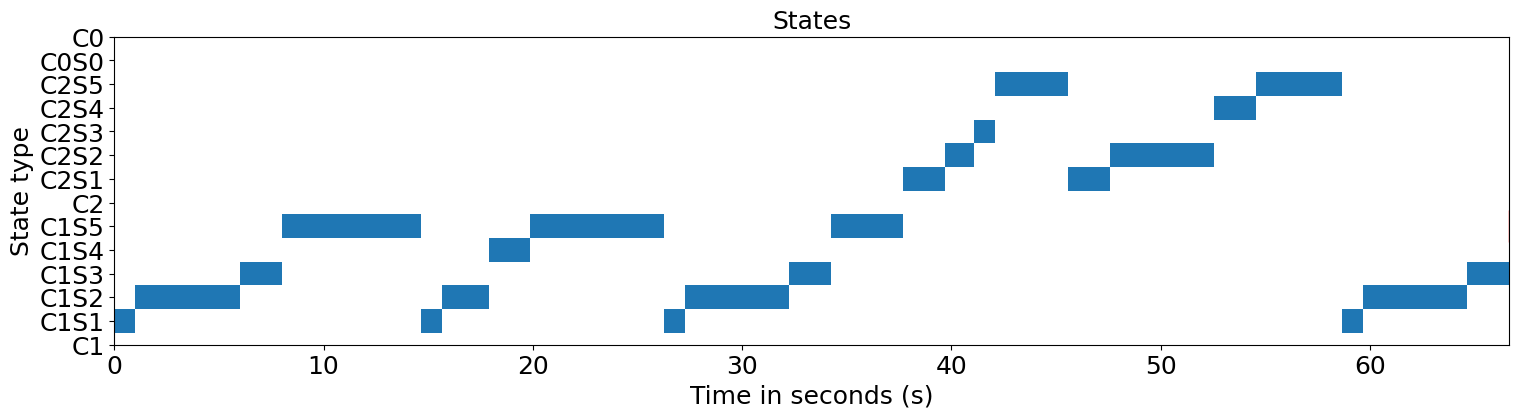

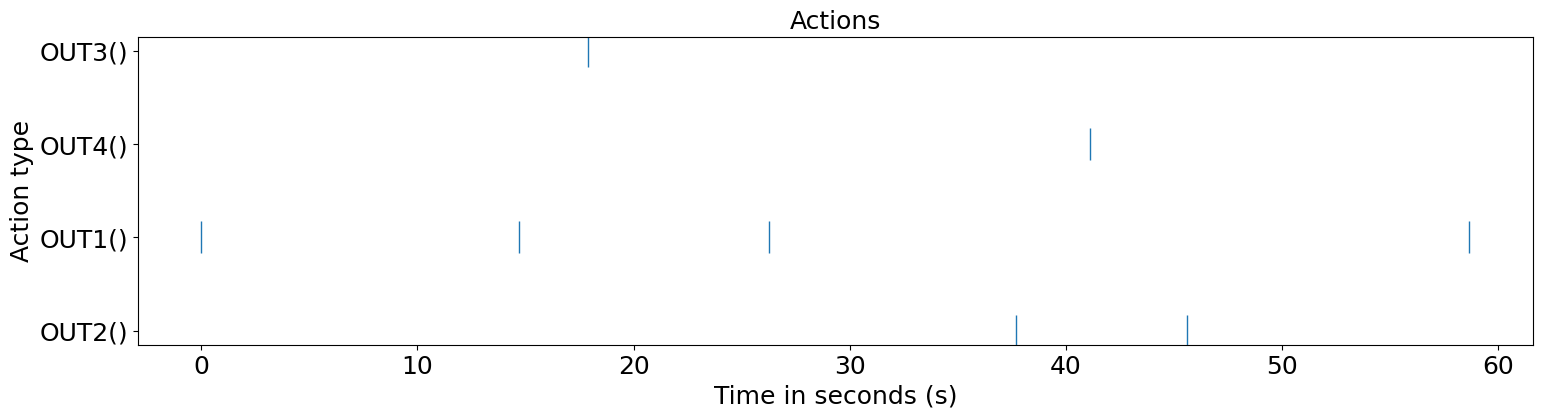

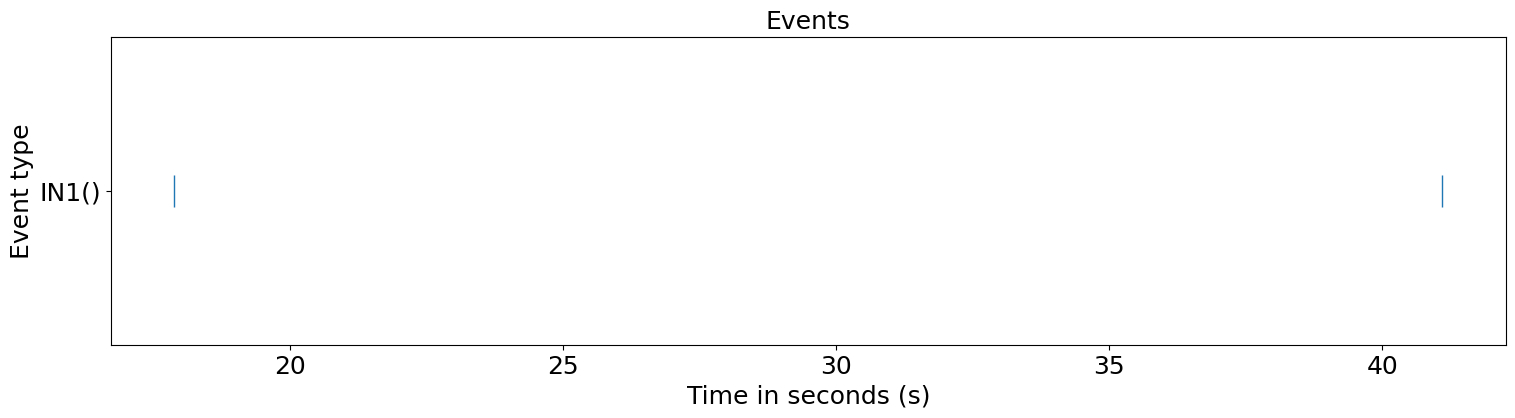

In [4]:
# Plot the events data
fig = plot_states(states=nwb.get_acquisition("states"),
                  state_types=nwb.get_lab_meta_data('task').state_types,
                  figsize=(18,4),
                  marker_size=500)
plt.title("States", fontsize=18)
plt.show()

# Plot the actions data
fig = plot_actions(actions=nwb.get_acquisition("actions"),
                   action_types=nwb.get_lab_meta_data('task').action_types,
                   show_action_values=True,
                   figsize=(18,4),
                   marker_size=500)
plt.title("Actions", fontsize=18)
plt.show()

# Plot the events data
fig = plot_events(events=nwb.get_acquisition("events"),
                  event_types=nwb.get_lab_meta_data('task').event_types,
                  show_event_values=True,
                  figsize=(18,4),
                  marker_size=500)
plt.title("Events", fontsize=18)
plt.show()


# Explore the file with NWBWidgets

In [5]:
from nwbwidgets import nwb2widget
nwb2widget(nwb)

# Print data parsed from the ARControl data file

In [6]:
import pprint
arcdata = arcontrol2nwb.arc2dict(
    arc_data_filename=arcfile,
    arc_taskprogram_aconf=None)
pprint.pprint(arcdata)

{'C1': array([[    0, 37681],
       [58668,  8000]]),
 'C1S1': array([[    0,  1002],
       [14682,  1000],
       [26261,  1000],
       [58668,  1000]]),
 'C1S2': array([[ 1002,  5000],
       [15682,  2205],
       [27261,  5000],
       [59668,  5000]]),
 'C1S3': array([[ 6002,  2000],
       [32261,  2000],
       [64668,  2000]]),
 'C1S4': array([[17887,  2000]]),
 'C1S5': array([[ 8002,  6680],
       [19887,  6374],
       [34261,  3420],
       [66668,     0]]),
 'C2': array([[37681, 20987]]),
 'C2S1': array([[37681,  2000],
       [45577,  2000]]),
 'C2S2': array([[39681,  1421],
       [47577,  5000]]),
 'C2S3': array([[41102,  1000]]),
 'C2S4': array([[52577,  2000]]),
 'C2S5': array([[42102,  3475],
       [54577,  4091]]),
 'IN1': [[17887, 1220], [41102, 1313]],
 'OUT1': [[0, 1002], [14682, 1000], [26261, 1000], [58668, 1000]],
 'OUT2': [[37681, 2000], [45577, 2000]],
 'OUT3': [[17887, 500]],
 'OUT4': [[41102, 1000]],
 'info': {'C0': {'label': 'End session'},
          

# Load and plot the States table form the NWB file

In [7]:
nwb.acquisition['states'].to_dataframe(index=True)

,start_time,stop_time,state_type
id,,,
0,0.000,1.002,1
1,1.002,6.002,2
2,6.002,8.002,3
3,8.002,14.682,5
4,14.682,15.682,1
5,15.682,17.887,2
6,17.887,19.887,4
7,19.887,26.261,5
8,26.261,27.261,1


For the StatesTable we can merge the definition of the references states by using ``to_hierarchical_dataframe`` instead. 

In [8]:
from hdmf.common.hierarchicaltable import to_hierarchical_dataframe
to_hierarchical_dataframe(nwb.acquisition['states']).reset_index()

source_table states                      state_types             \
label            id start_time stop_time          id state_name   
0                 0      0.000     1.002           1       C1S1   
1                 1      1.002     6.002           2       C1S2   
2                 2      6.002     8.002           3       C1S3   
3                 3      8.002    14.682           5       C1S5   
4                 4     14.682    15.682           1       C1S1   
5                 5     15.682    17.887           2       C1S2   
6                 6     17.887    19.887           4       C1S4   
7                 7     19.887    26.261           5       C1S5   
8                 8     26.261    27.261           1       C1S1   
9                 9     27.261    32.261           2       C1S2   
10               10     32.261    34.261           3       C1S3   
11               11     34.261    37.681           5       C1S5   
12               12     37.681    39.681           7       C2S1   
13               13     39.681    41.102           8       C2S2   
14               14     41.102    42.102           9       C2S3   
15               15     42.102    45.577          11       C2S5   
16               16     45.577    47.577           7       C2S1   
17               17     47.577    52.577           8       C2S2   
18               18     52.577    54.577          10       C2S4   
19               19     54.577    58.668          11       C2S5   
20               20     58.668    59.668           1       C1S1   
21               21     59.668    64.668           2       C1S2   
22               22     64.668    66.668           3       C1S3   
23               23     66.668    66.668           5       C1S5   

source_table                   
label             state_label  
0                       GoCue  
1             Response window  
2                        Miss  
3                       Inter  
4                       GoCue  
5             Response window  
6                      Reward  
7                       Inter  
8                       GoCue  
9             Response window  
10                       Miss  
11                      Inter  
12                   NoGo Cue  
13                  Resp. Win  
14                     Punish  
15                      Inter  
16                   NoGo Cue  
17                  Resp. Win  
18               Correct Rej.  
19                      Inter  
20                      GoCue  
21            Response window  
22                       Miss  
23                      Inter

In [9]:
# Compute the transition count and probablity matrix
state_transition_count_df, state_transition_probability_df = compute_state_transition_matrix(
    states=nwb.acquisition['states'].to_dataframe(index=True).sort_values(by='start_time'), 
    state_types=nwb.get_lab_meta_data('task').state_types)

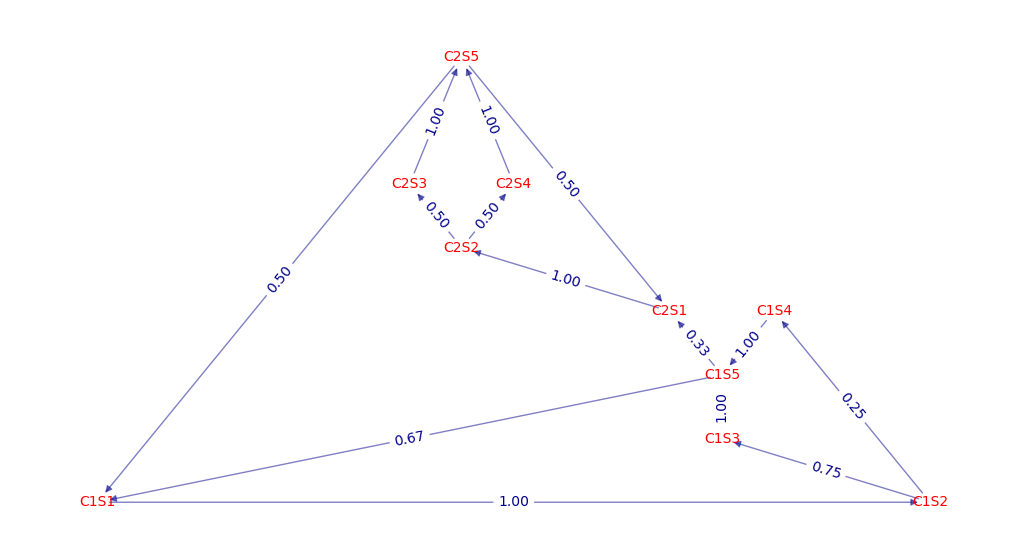

In [10]:
ig = plot_state_transition_graph(
    state_transition_probability_df,
    figsize=(13,7),
    edge_color='darkblue',
    edge_font_color='darkblue',
    node_font_color='red',
    fontsize=10
)
plt.show()

# Load and plot the TrialsTable from the NWB file

In [11]:
# Get the TrialsTable from file
trials = nwb.trials
display(trials.to_dataframe(index=True))

,start_time,stop_time,states,events,actions
id,,,,,
0,0.000,37.681,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",[0],"[0, 1, 2, 3]"
1,37.681,58.668,"[13, 14, 15, 16, 17, 18, 19]",[1],"[4, 5, 6]"
2,58.668,66.668,"[20, 21, 22, 23]",[],[7]


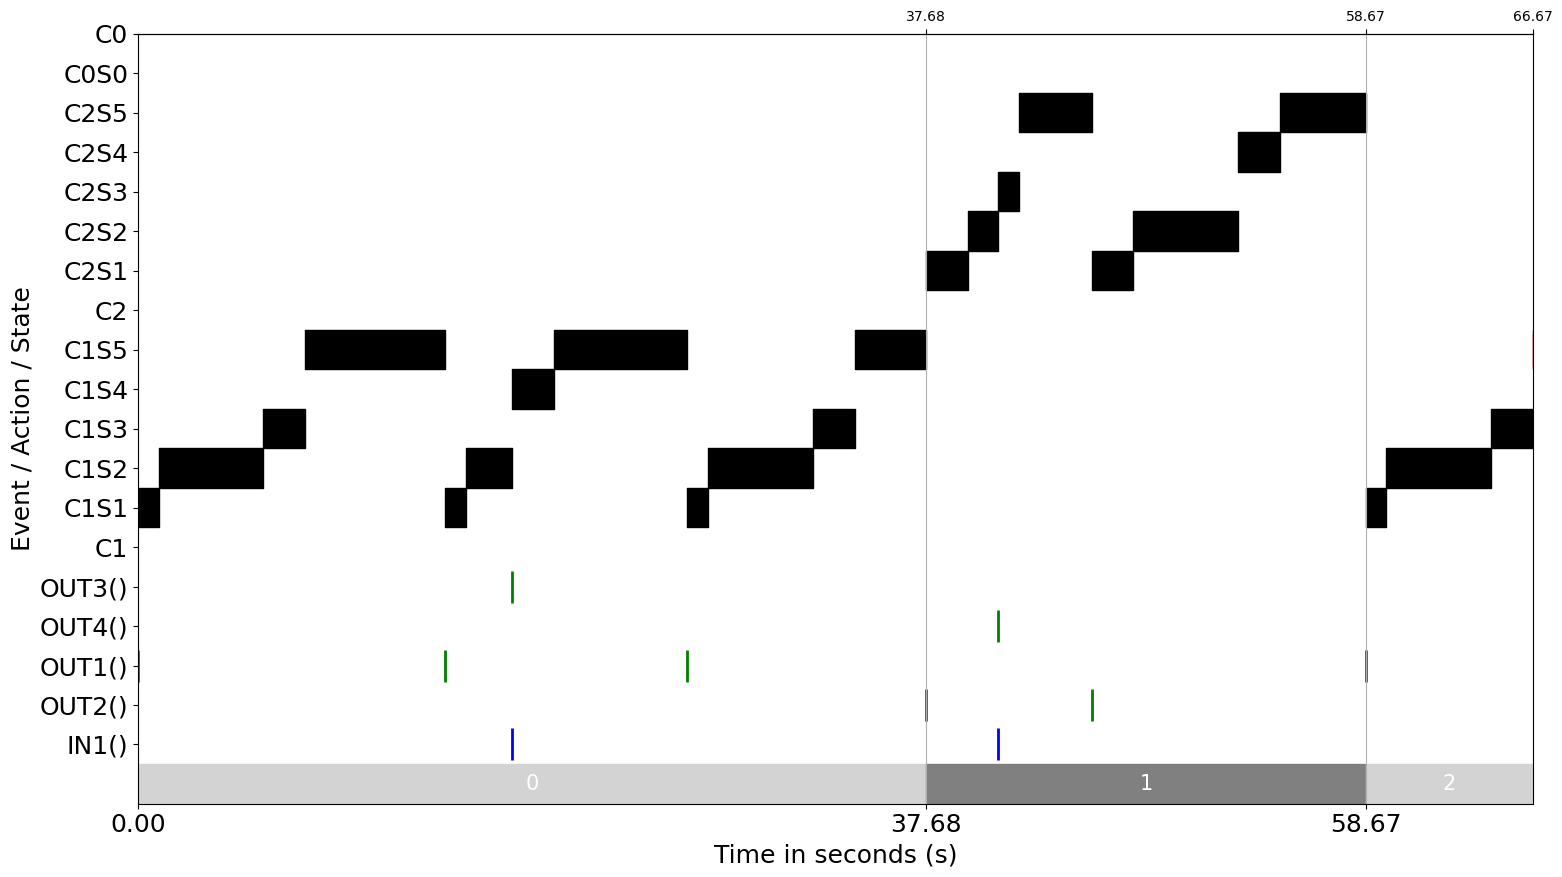

In [12]:
# Plot trials
plot_trials(
    trials=trials,
    states=nwb.acquisition['states'], 
    state_types=nwb.get_lab_meta_data('task').state_types,
    actions=nwb.acquisition['actions'], 
    action_types=nwb.get_lab_meta_data('task').action_types,
    events=nwb.acquisition['events'], 
    event_types=nwb.get_lab_meta_data('task').event_types,
    figsize=None,
    fontsize=18,
    rectangle_height=1,
    marker_size=500)
plt.show()